# About Dataset (MetroPT3)

This dataset include values of pressure , temparature , motor current , air intake valves , etc collected from Air Pressure Unit (APU) of a metro train. The datasetc consist of 15169480 data points collected at 1Hz from february to august 2020. Data is measure from 7 analog and 8 digital sensors.


In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/maulikthakkar/Downloads/MetroPT3.csv')
df.columns



Index(['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses'],
      dtype='object')

**Columns Present**

1) TP2(bar) : The pressure on the compressor.

2) TP3(bar) : The pressure at pneumatic pannel.

3) H1(bar)  : The pressure generated as a result of pressure drop when the cyclonic separator filter    discharges.

4) DV Pressure(bar) : The pressure drop caused as the towers discharge air dryers; a zero value indicates that the compressor is working under load.

5) Reservoirs(bar) : The downstream reservoir pressure, which should be close to the pneumatic panel pressure (TP3).

6) Motor Current (A) : The current of one phase of a three-phase motor is measured; it displays values close to 0A when turned off, 4A while working offloaded, 7A when operating under load, and 9A when it starts functioning.

7) Oil temperature (celcius) : Oil temparature on the compressor.

8) COMP

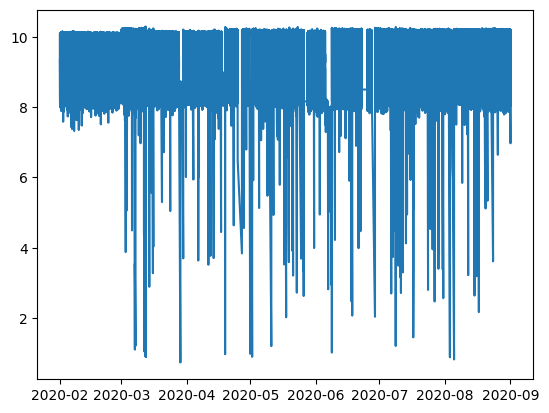

In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

plt.plot(df['timestamp'] , df['TP3'])

